In [1]:
#get data
from sklearn import datasets
iris = datasets.load_iris()
#print(iris.data) #attribution
#print(iris.target) #class
#print(iris.feature_name) #欄位名稱
print(iris.target_names) #classcount

['setosa' 'versicolor' 'virginica']


In [2]:
#split data to two parts training & testing
from sklearn.model_selection import train_test_split
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split( x, y, train_size = 0.7) #train split 成0.7

In [3]:
#establish a model
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit( x_train, y_train ) #fit data

y_pred1 = model1.predict(x_test)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier( n_neighbors = 7 )
model2.fit( x_train, y_train )

y_pred2 = model2.predict(x_test)

In [5]:
#model evaluation
from sklearn import metrics

print(metrics.confusion_matrix( y_test, y_pred1))
print(metrics.confusion_matrix( y_test, y_pred2))
print( metrics.classification_report(y_test, y_pred1))
print( metrics.classification_report(y_test, y_pred2))


[[10  0  0]
 [ 0 15  2]
 [ 0  1 17]]
[[10  0  0]
 [ 0 15  2]
 [ 0  0 18]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.94      0.88      0.91        17
           2       0.89      0.94      0.92        18

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.88      0.94        17
           2       0.90      1.00      0.95        18

    accuracy                           0.96        45
   macro avg       0.97      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [10]:
#clustering
import pandas as pd

rating = [['Steven', 5, 5, 2, 1 ],
          ['Jerry',  4, 5, 3, 2 ],
          ['Jacky',  4, 4, 4, 3 ],
          ['Lisa',   2, 2, 4, 5 ],
          ['Alice',  1, 2, 3, 4 ],
          ['Bella',  2, 1, 5, 5 ]]
movies = pd.DataFrame( rating, columns=['Name', 'A', 'B', 'C', 'D'])
movies


,Name,A,B,C,D
0,Steven,5,5,2,1
1,Jerry,4,5,3,2
2,Jacky,4,4,4,3
3,Lisa,2,2,4,5
4,Alice,1,2,3,4
5,Bella,2,1,5,5


In [11]:
from sklearn.cluster import KMeans

data = movies.drop( 'Name', axis = 1) #拿掉欄位
model3 = KMeans( n_clusters = 2) #分幾群
model3.fit(data)


print( model3.labels_)

[1 1 1 0 0 0]


In [12]:
model3.cluster_centers_

array([[1.66666667, 1.66666667, 4.        , 4.66666667],
       [4.33333333, 4.66666667, 3.        , 2.        ]])

<AxesSubplot:xlabel='x', ylabel='y'>

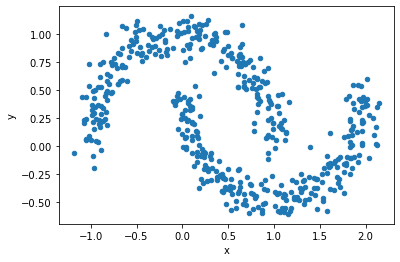

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
data, y = datasets.make_moons(n_samples = 500, noise = 0.1) #半月形資料
data = pd.DataFrame( data, columns=['x','y'] )
data.plot.scatter( x = 'x', y = 'y')

<AxesSubplot:xlabel='x', ylabel='y'>

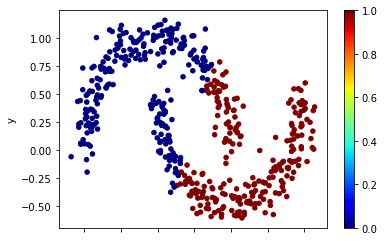

In [14]:
from sklearn.cluster import KMeans

model3 = KMeans( n_clusters = 2) #分幾群
model3.fit(data)


data.plot.scatter( x = 'x', y = 'y', c = model3.labels_, cmap = 'jet')

<AxesSubplot:xlabel='x', ylabel='y'>

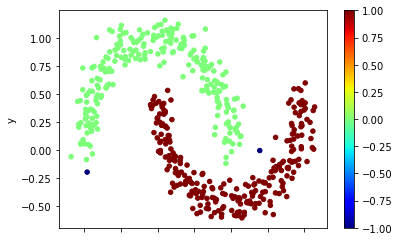

In [19]:
from sklearn.cluster import DBSCAN

model4 = DBSCAN( eps = 0.2, min_samples = 10)
model4.fit(data)
data.plot.scatter( x = 'x', y = 'y', c = model4.labels_, cmap = 'jet')